### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [1]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [4]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [5]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [6]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

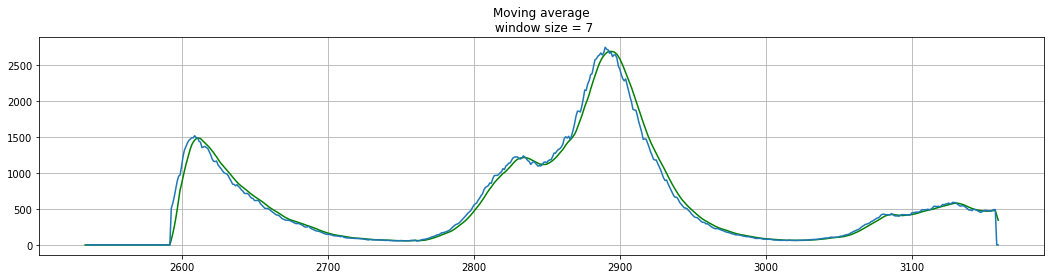

In [19]:
# Demonstrate the use of the function to plot moving averages

# YOUR CODE HERE
window = 7
plot_moving_average(sample_ci['Hospitalised'], window, plot_intervals=False, scale=1.96)




In [14]:
# Demonstrate the use of the function to plot moving averages


# MODEL ANSWER END

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [22]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714


>In the above, I believe the consultant was trying to anwser a few questions: 
* Firstly, to identify the top 3 days that may have seen peaks in terms of covid hospitalizations. 
* Secondly, through identitying these days, and calculating the error, the consultant would be able to assert whether or not the peaks are accurate. 
* Lastly, if the peeks are deemed inaccurate due to the error, the consultant could then take a step back and reconsidered the rolling average, as it may be skewed by the inaccurate peaks. 

All in all, the calcuation is useful and does provide some insights into the data and the situation during covid. If accurate, these findings could as an example help highlight a "super-spreader" event that may have take place a few days before the peak. 

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Anwser:


**Qualitative data**, also known as categorical data, is data that describes qualities and/or characteristics. Whereas **quantitative data** is data of measurable values in the form of numbers and counts. 

* As an example, customer satisfaction surveys and customer demographics are a good example of qualitative data which can be used in business predictions.

* On the other hand, sales figures over time is a good example of quantitative data which can be used in business predictions. 


#### Question 3.2
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Anwser: 

In the word of data analytics, it is almost never the case that a project is "done". Very rarely is it the case the data generation for a specific case ceases. In fact, it is almost the case that new data points are being generated. As an example, the data sets examined here by the consultant is almost 2 years old. While it is still valid data, the introduction of data sets from then and up to today will very likely offer new insights that are otherwise completely missed. 

Further, there are other indirect discoveries that may require a data analyist to reconsider their analysis over time. A perfect example of that is the case of the racial bais highlighted in an algorithm for used by healthcare providers in the United States recently. In light of such a disturbing and impactful discovery, it is critical that analysts go back and re-examine the data with this new information. Perhaps, new results and insights can be extracted. 

While this may be an extreme case, nonetheless the changing nature of the subject should always be considered by an analyst and communicated clearly to the client. It defines the importances of continuous improvement and the frequency an analyst should be visiting / revisitng the data and their analysis. 

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

Anwser:

Governments must NOT ignore data ethics. Although the privacy of individuals may be protected, is the overall use of the data serving the overall public interest? In the case of Covid and the analysis above, is the use of the data helping identify paterns that are useful for the public good of understanding Covid, its spread, affected populations, uptake in vaccinations, recoveries, etc. 
In the case of Covid, the anwser to the above may be a lot easer than some other cases. 

----